# OBJECTIVE, PROBLEM AND DATA
Objective: To learn the basics of regression. 
    * Cost Function
    * Gradient Descent, Leanring rates
    * Data Normalization
    * Iterative method vs Direct Method for regression
    * How to work with categorical variables / one hot encoding
    * Learn to use scikit-learn library for regression

Problem: We will solve two set of problems 
1. Predicting house price
2. Predicting weather station maintenence request counts

Data: We will use two sets of data
1. File housing_data.txt is a comma separated file having three comumns: surface area of the house, number of rooms and the price of the house.
2. Met_traing.csv and Met_test.csv 

# INTRODUCTION
Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. Is used to predict values within a continuous range. (e.g. sales, price) 

<b>Simple Regression:</b> Simple linear regression uses traditional slope-intercept form, where $m$ and $b$ are the variables our algorithm will try to “learn” to produce the most accurate predictions. $x$ represents our input data and $y$ represents our prediction.

$\hat {y}=\theta_{1}x+\theta_{0}$

In order to compute the values of $m$ and $b$ we need to minimize a cost function. In the case of Linear Regression it is given by

$J(\theta) = \frac{1}{m}\Sigma_{i=i}^{m}(\hat {y}_{i}-y_{i})^{2}$

<img src='./images/lr.jpg'>

Multivariable regression

A more complex, multi-variable linear equation might look like this, where $\theta$ represents the coefficients, or weights, our model will try to learn.

$\hat {y}=\Sigma_{i=0}^{n}\theta_{i}x_{i}=\Theta \dot X$

where 

In multivariate regression we seek a set of parameters 

$\textbf{$\Theta$} = [\theta_{0} \quad \theta_{1} \quad \cdots \quad \theta_{i} \quad \cdots \quad \theta_{m}]^{T}$
               
which minimizes the the cost function:
Hypothesis 
$\textbf{H}=\textbf{X $\Theta$}$

Cost function is $\textbf{J($\Theta$)}=\frac{1}{2m}(\textbf{X$\Theta$} -\textbf{Y})^{T}(\textbf{X$\Theta$} -\textbf{Y})$

The advantages of Linear Regression are that they computationally efficient, simple and easy to interpret. However, the algorithm fails to capture non-linear behavior.


Import all required libraries

<a href='http://www.numpy.org/'>NumPy</a> is the fundamental package for scientific computing with Python. It contains among other things:
* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

<a href='https://matplotlib.org/'>Matplotlib</a> is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn import datasets,linear_model

Load the data from the data.txt file. The file has three comumns. The colums represent the surface area, number of rooms and the price of the apartment. 

In [2]:
data = np.loadtxt('./data/housing_data.txt', delimiter=",")
X = data[:,:2]
y = data[:,2]
m = len(y)
#print(X)
#print(y)

Plot the data and have a look

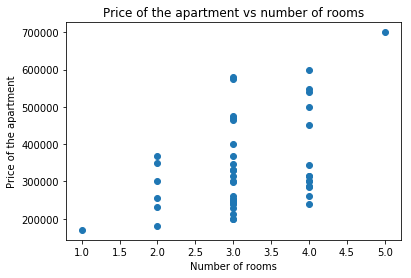

In [3]:
plt.scatter(X[:,1],y)
plt.xlabel("Number of rooms")
plt.ylabel("Price of the apartment")
plt.title("Price of the apartment vs number of rooms")
plt.show()

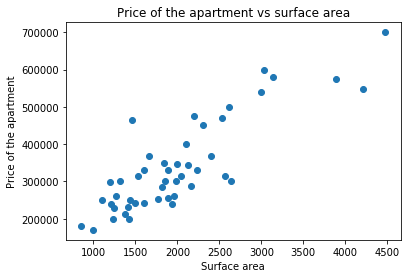

In [4]:
plt.scatter(X[:,0],y)
plt.xlabel("Surface area")
plt.ylabel("Price of the apartment")
plt.title("Price of the apartment vs surface area")
plt.show()

Feature normalization. SInce there is a huge different between the magnitudes of the surface area (eg. 2104) and the number (eg. 2) of the rooms, in order the speed up the process at the optimization step we subtract the mean and divide by the standard deviation. The function below helps in doing so.

In [5]:
# Normalize features
def featureNormalize(X):
    X_norm = X
    mu    = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    for i in range(X.shape[1]):
        mu[:,i] = np.mean(X[:,i])
        sigma[:,i] = np.std(X[:,i])
        X_norm[:,i] = (X[:,i] - float(mu[:,i]))/float(sigma[:,i])
    return X_norm, mu, sigma

In [6]:
X_norm, mu, sigma = featureNormalize(X)

Add a column of 1 to account for the bias term.

In [7]:
X_padded = np.column_stack((np.ones((m,1)), X_norm))
house_norm_padded = np.array([1, 1650, 3])

We need to minimize the Loss function
$\textbf{J($\Theta$)}=\frac{1}{2m}(\textbf{X$\Theta$} -\textbf{Y})^{T}(\textbf{X$\Theta$} -\textbf{Y})$

In [8]:
# Compute the loss
def computeLoss(X,y,theta): 
  m=len(y)
  Loss=0.0;
  Loss=1.0/2.0/m*np.sum((X.dot(theta)-y)**2);
  return Loss;

Minimize the loss function using gradient descent. 
<img src='images/gd.jpg'>

In [9]:
# Solves using Gradient Descent
def gradientDescent(X, y, alpha, num_iters):
    m,n = X.shape
    theta = np.zeros((X.shape[1],1))
    Loss_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        theta = theta - alpha*(1.0/m) * np.transpose(X).dot(X.dot(theta) - np.transpose([y]))    
        Loss_history[i] = computeLoss(X, y, theta)
    return theta, Loss_history

$\alpha$ is called the learning rate. Very big values of alpha can cause divergence and we might never compute the minima. If the convergence is not achieved consider decreasing the value of $\alpha$
Very big values of \alpha (learning rate)

In [10]:
def SolveGradientDescent(X,y,alpha, num_iters):
    m,n=X.shape
    theta, Loss_history = gradientDescent(X, y, alpha, num_iters)
    plt.plot(range(Loss_history.size), Loss_history, "-b", linewidth=2 )
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')
    plt.show(block=False)
    theta.shape
    return theta

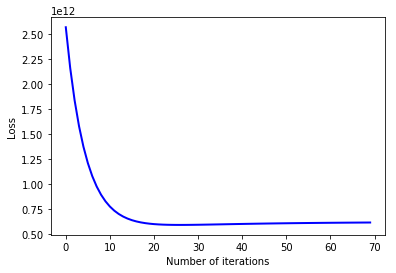

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): [  1.76814548e+08]


In [11]:
theta_GD=SolveGradientDescent(X=X_padded,y=y,alpha=0.1,num_iters=70)
#Display gradient descent's result
#print('Theta computed from gradient descent: ',theta_GD)
price_GD = np.array(house_norm_padded).dot(theta_GD)
print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):", price_GD)

Genrally for very large problems due to memory requirements gradient descent algorithm is used for minimization but since here we are working with relatively small dataset with smaller number of feature vectors $X$, we have used direct method for finiding the minima. This involves invoking the closed-form solution to linear regression

$\Theta=(X^{T}X)^{-1}X^{T}Y$

In [12]:
# Solve using direct method
def normalEqn(X, y):  
    theta = np.zeros((X.shape[1], 1))
    theta = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    return theta

In [13]:
theta_Normal = normalEqn(X_padded, y)
#print("Theta calculated by Normal Equation ",theta_Normal)
price_Normal = np.array(house_norm_padded).dot(theta_Normal)
print("Predicted price of a 1650 sq-ft, 3 br house (using normal equation):", price_Normal)

Predicted price of a 1650 sq-ft, 3 br house (using normal equation): 180909541.77


# Regression using scikit-learn library in two lines

In [14]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_padded,y)
#print("Theta calculated by SK-learn regression ",lr.coef_)
print("Predicted price ",lr.predict(house_norm_padded.reshape(1,-1)))

Predicted price  [  1.80909542e+08]


# Example 2

In [15]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


Data Description
    
* date : yyyy-mm-dd format
* calendar_code : 0 or 1 (a code describing certain calendar events)
* request_count : an integer (the number of support requests received on that date)
* site_count : an integer (the number of sites operating on that date)
* max_temp : a 􀃛oat (max temperature for that day in degrees Celsius)
* min_temp : a 􀃛oat (min temperature for that day in degrees Celsius)
* precipitation : a 􀃛oat (millimeters of precipitation on that date)
* events : a string (description of weather events on that date)

Our aim is to predict the request_count when the other paeameters are given.

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#ALso remember to parse the date column. This will be helpful in the next step
training_data=pd.read_csv('./data/Met_train.csv',sep=',',parse_dates=['date'])
#Have a look at the data
training_data.head()

,date,calendar_code,request_count,site_count,max_temp,min_temp,precipitation,events
0,2014-09-01,0.0,165,6,30.6,22.8,0.0,Rain
1,2014-09-02,1.0,138,7,32.8,22.8,15.5,Rain-Thunderstorm
2,2014-09-03,1.0,127,7,29.4,18.3,0.0,None
3,2014-09-04,1.0,174,7,29.4,17.2,0.0,None
4,2014-09-05,1.0,196,7,30.6,21.7,0.0,Fog


Let us try to get a better insight into the data. First let us have a look at the dependence of request counts on the float variables.

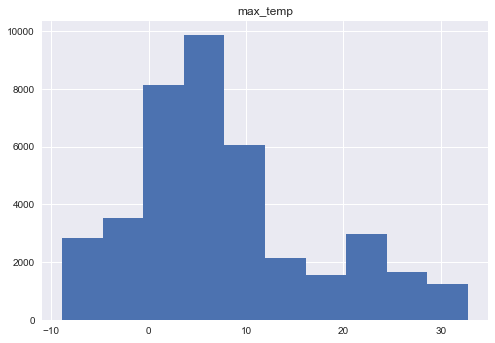

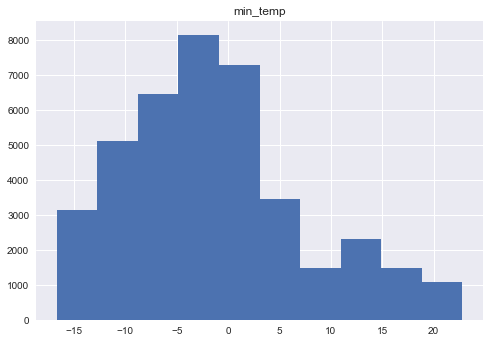

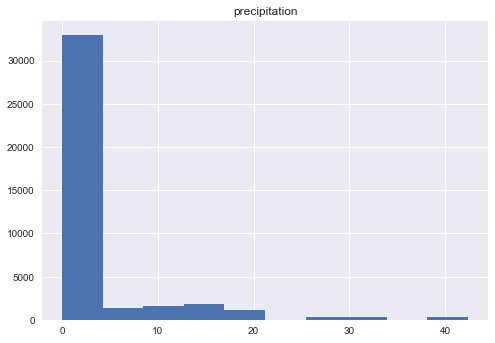

In [18]:
training_data.hist('max_temp',weights=training_data['request_count'])
training_data.hist('min_temp',weights=training_data['request_count'])
training_data.hist('precipitation',weights=training_data['request_count'])
plt.show()


From the above histograms we see that most of the request comes when 1). maximum temperature is below 10C 2). min temperature is below 2C 3) When there is zero precipitation

We use violin plot for dependence on the categorical variables (https://blog.modeanalytics.com/violin-plot-examples/)

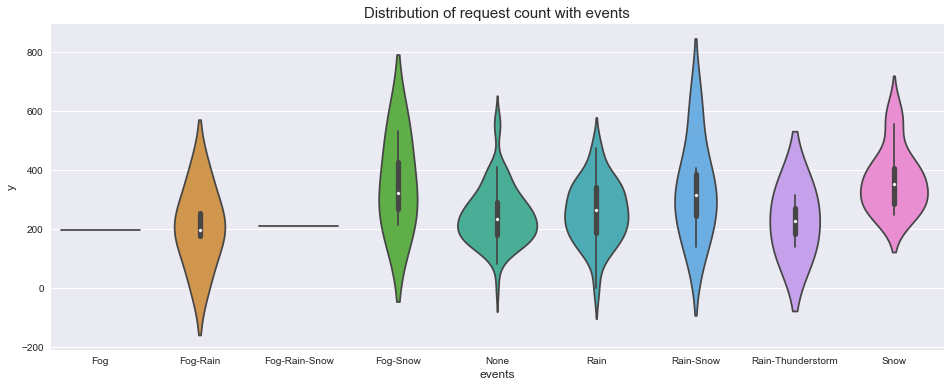

In [19]:
var_name = "events"
col_order = np.sort(training_data[var_name].unique()).tolist()
plt.figure(figsize=(16,6))
sns.violinplot(x=var_name, y='request_count', data=training_data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of request count with "+var_name, fontsize=15)
plt.show()

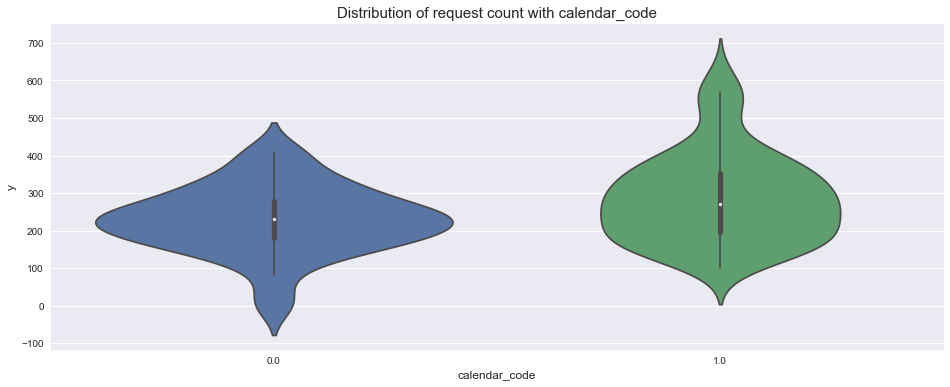

In [20]:
var_name = "calendar_code"
col_order = np.sort(training_data[var_name].unique()).tolist()
plt.figure(figsize=(16,6))
sns.violinplot(x=var_name, y='request_count', data=training_data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of request count with "+var_name, fontsize=15)
plt.show()

In [21]:
training_data['day_of_week'] = training_data['date'].dt.dayofweek
training_data['week_day'] = training_data['date'].dt.weekday_name
training_data.head()

,date,calendar_code,request_count,site_count,max_temp,min_temp,precipitation,events,day_of_week,week_day
0,2014-09-01,0.0,165,6,30.6,22.8,0.0,Rain,0,Monday
1,2014-09-02,1.0,138,7,32.8,22.8,15.5,Rain-Thunderstorm,1,Tuesday
2,2014-09-03,1.0,127,7,29.4,18.3,0.0,None,2,Wednesday
3,2014-09-04,1.0,174,7,29.4,17.2,0.0,None,3,Thursday
4,2014-09-05,1.0,196,7,30.6,21.7,0.0,Fog,4,Friday


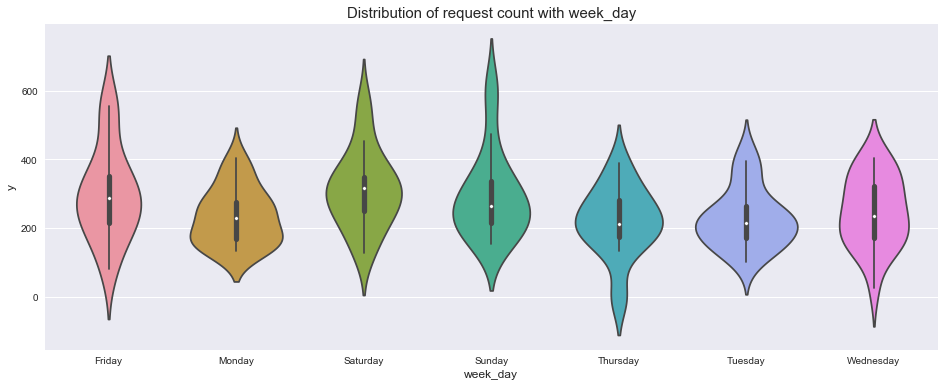

In [22]:
var_name = "week_day"
col_order = np.sort(training_data[var_name].unique()).tolist()
plt.figure(figsize=(16,6))
sns.violinplot(x=var_name, y='request_count', data=training_data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of request count with "+var_name, fontsize=15)
plt.show()

Next we convert the events into some unique identifiers (integers). This will result in an additional column "events_code"

In [23]:
training_data['events_code'] = pd.Categorical(training_data["events"]).codes
training_data.head()

,date,calendar_code,request_count,site_count,max_temp,min_temp,precipitation,events,day_of_week,week_day,events_code
0,2014-09-01,0.0,165,6,30.6,22.8,0.0,Rain,0,Monday,5
1,2014-09-02,1.0,138,7,32.8,22.8,15.5,Rain-Thunderstorm,1,Tuesday,7
2,2014-09-03,1.0,127,7,29.4,18.3,0.0,None,2,Wednesday,4
3,2014-09-04,1.0,174,7,29.4,17.2,0.0,None,3,Thursday,4
4,2014-09-05,1.0,196,7,30.6,21.7,0.0,Fog,4,Friday,0


Since request count is the target variable, we store it separately as "y"

In [24]:
y=training_data["request_count"]
print("Shape of y ",y.shape)

Shape of y  (152,)


Drop the redundant columns now "date","events","request_count"

In [25]:
training_data = training_data.drop(["date","events","request_count","week_day"],axis=1)
training_data.head()

,calendar_code,site_count,max_temp,min_temp,precipitation,day_of_week,events_code
0,0.0,6,30.6,22.8,0.0,0,5
1,1.0,7,32.8,22.8,15.5,1,7
2,1.0,7,29.4,18.3,0.0,2,4
3,1.0,7,29.4,17.2,0.0,3,4
4,1.0,7,30.6,21.7,0.0,4,0


The categorical values day_of_week, events_code and calender code needs to be one-hot-encoded to be used as a feature input vector.

In [26]:

training_data= pd.get_dummies(training_data,columns=["calendar_code","events_code","day_of_week"],prefix=["calendar","event","week"])
training_data.head()

,site_count,max_temp,min_temp,precipitation,calendar_0.0,calendar_1.0,event_0,event_1,event_2,event_3,...,event_6,event_7,event_8,week_0,week_1,week_2,week_3,week_4,week_5,week_6
0,6,30.6,22.8,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,7,32.8,22.8,15.5,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,7,29.4,18.3,0.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7,29.4,17.2,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,7,30.6,21.7,0.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Call the feature vectors X

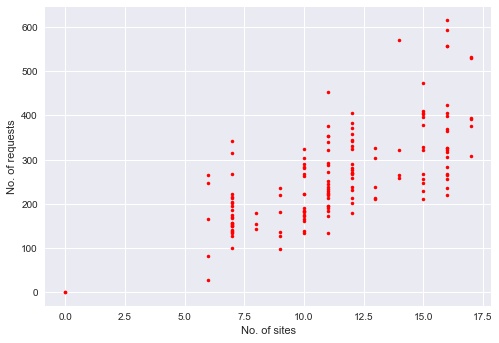

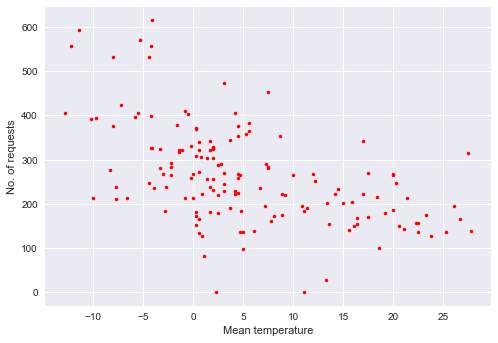

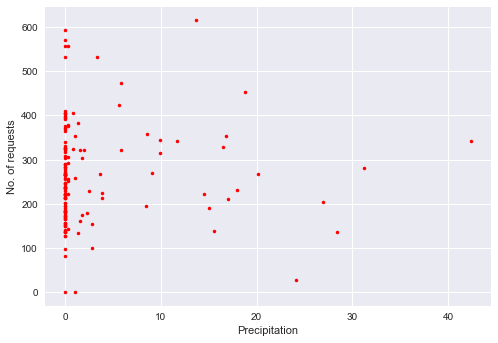

In [27]:
X=training_data.values

plt.figure(1)
plt.plot(X[:,0],y[:],'r.')
plt.xlabel("No. of sites")
plt.ylabel("No. of requests")
plt.show()

plt.figure(1)
plt.plot((X[:,1]+X[:,2])/2.0,y[:],'r.')
plt.xlabel("Mean temperature")
plt.ylabel("No. of requests")
plt.show()

plt.figure(1)
plt.plot(X[:,3],y[:],'r.')
plt.xlabel("Precipitation")
plt.ylabel("No. of requests")
plt.show()

It appeats that the no of requests has some kind of a quadratic dependence on the mean temperature so in addition to max and min temperature we should construct a new feature $((minx+maxx)/2)^{2}$

In [28]:
X=np.column_stack([X,(X[:,1]+X[:,2])**2.0])

In [29]:
#Split the data into training and validation test
X_train, X_val, y_train, y_val =  train_test_split(X,y,test_size=0.2,random_state = 0)

Conduct a multivariate linear regression on the dataset.

In [30]:
#Multivariabte regression
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_train_pred=regr.predict(X_train)
print("Mean squared error on training set: %.2f" % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Mean squared error on validation set: %.2f" % np.mean((regr.predict(X_val) - y_val) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score on training set: %.2f' % regr.score(X_train, y_train))
print('Variance score on validation set: %.2f' % regr.score(X_val, y_val))

Mean squared error on training set: 2050.26
Mean squared error on validation set: 3354.57
Variance score on training set: 0.82
Variance score on validation set: 0.77


In [31]:
pred_LR = regr.predict(X_val)
y_val = y_val.reshape(-1,1)

/home/adil/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [32]:
#m,input_layer_size=X.shape
#hidden_layer_size = input_layer_size   
#ANN_classifier = Sequential()
#ANN_classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_layer_size))
#ANN_classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
#ANN_classifier.add(Dense(units = 1, kernel_initializer = 'normal'))
#ANN_classifier.compile(loss='mean_squared_error', optimizer='adam')
#history=ANN_classifier.fit(X_train, y_train, batch_size = 15, epochs = 4000,verbose=0)

In [33]:
#pred_train = ANN_classifier.predict(X_train)
#pred = ANN_classifier.predict(X_val)
#print("Mean squared error: ", np.mean((pred_train - y_train.values.reshape(-1,1)) ** 2))
#print("Mean squared error: ", np.mean((pred - y_val.reshape(-1,1)) ** 2))

In [34]:
for i in range(len(pred_LR)):
    print(y_val[i],pred_LR[i])
    #print(y_val[i],pred_LR[i],pred[i])

[214] 238.034675893
[322] 319.680588489
[383] 298.20747587
[203] 210.606509338
[232] 233.435611564
[268] 284.532018821
[27] 92.0504257959
[150] 158.220910418
[322] 360.04546281
[339] 307.729653896
[183] 165.883823091
[406] 353.663204344
[318] 339.068823498
[267] 202.445832986
[281] 213.484634594
[570] 409.558669316
[343] 306.445742376
[202] 207.30683584
[229] 223.757677269
[234] 99.4213477369
[593] 536.882495537
[344] 292.053770194
[410] 299.039183423
[531] 479.788242363
[327] 238.681242899
[290] 259.636307388
[171] 144.667759171
[321] 324.155414033
[304] 327.174144767
[180] 155.127868625
[137] 155.740139511


In [ ]:
# Solve it using SVM, Decision Tree and Artificial Neural Network